# Comparison

In [2]:
import pandas as pd
import numpy as np
import itertools
from tqdm.notebook import tqdm
import pickle
from matplotlib import pyplot as plt
import random
from datetime import datetime
import pytz
import line_profiler

In [18]:
# Baselines
# baseline = pd.read_pickle('results/baseline.pkl')
baseline622 = pd.read_pickle('results/baseline622.pkl')
# vanilla = pd.read_pickle('results/origin_baseline.pkl')
# baseline2 = pd.read_pickle('results/baseline_0605.pkl')
# baseline3 = pd.read_pickle('results/baseline_0606.pkl')
param2 = pd.read_pickle('results/param_baseline_0605.pkl')

# Diff
svd = pd.read_pickle('results/svd.pkl')
pca = pd.read_pickle('results/pca_625.pkl')
item_diff = pd.read_pickle('results/ITEM_DIFF.pkl')
vae = pd.read_pickle('results/diff_vae.pkl')

# Hybrid constant
# hybrid_svd = pd.read_pickle('results/hybrid_diff_svd.pkl')
# hybrid_svd610 = pd.read_pickle('results/hybrid_param_multiplier_610.pkl')
# hybrid_svd2 = pd.read_pickle('results/hybrid_diff_svd2.pkl')
# hybrid_svd_ax = pd.read_pickle('results/hybrid_diff_svd_AX_1662.pkl')
# hybrid_svd_ax27 = pd.read_pickle('results/hybrid_diff_svd_AX_27.pkl')
# ax_svd = pd.read_pickle('results/hybrid_diff_svd_Ax_action_noise.pkl')
# hybrid_svd2x = pd.read_pickle('results/hybrid_diff_svd_2x_action_noise.pkl')
# hybrid_svd_2x_622 = pd.read_pickle('results/hybrid_svd_2x_622.pkl')
# hybrid_svd2x_decay = pd.read_pickle('results/hybrid_diff_svd_2x_decay.pkl')

# Hybrid vdbe
# vdbe_svd = pd.read_pickle('results/hybrid_diff_svd_vdbe_multiplier.pkl')
# vdbe_svd_decay = pd.read_pickle('results/hybrid_diff_svd_vdbe_multiplier_decay.pkl')

# vdbe_pca = pd.read_pickle('results/hybrid_vdbe_pca.pkl')

# Hybrid param
# param_multiplier = pd.read_pickle('results/hybrid_diff_svd_param_multiplier.pkl')
# param_pca = pd.read_pickle('results/hybrid_param_pca.pkl')

# Interleaving
# Pure
ntlv = pd.read_pickle('results/interleaving.pkl')
ntlv_ma = pd.read_pickle('results/interleaving_major.pkl')
ntlv_param_ma = pd.read_pickle('results/interleaving_param_major.pkl')
# Diff
interleaving = pd.read_pickle('results/interleaving_2xdecay.pkl')
interleaving_decay = pd.read_pickle('results/interleaving_decay_2xdecay.pkl')
interleaving_decay_2x = pd.read_pickle('results/interleaving_decay_2x.pkl')
interleaving_major = pd.read_pickle('results/interleaving_decay_2xdecay_major.pkl')
interleaving_major_param = pd.read_pickle('results/interleaving_major_param.pkl')
interleaving_param = pd.read_pickle('results/interleaving_param.pkl')
# interleaving_param_pre300 = pd.read_pickle('results/interleaving_param_pre300.pkl')

# NEW

# Interleaving
interleaving_ax_pca = pd.read_pickle('results/interleaving_ax_pca.pkl')
interleaving_decay_ax_pca = pd.read_pickle('results/interleaving_decay_ax_pca.pkl')
interleaving_major_pca = pd.read_pickle('results/interleaving_major_pca.pkl')
interleaving_param_major_pca = pd.read_pickle('results/interleaving_param_major_pca.pkl')

# Hybrid
hybrid_2x_pca = pd.read_pickle('results/hybrid_2x_pca.pkl')
hybrid_2x_decay_pca = pd.read_pickle('results/hybrid_2x_decay_pca.pkl')
hybrid_ax_decay_pca = pd.read_pickle('results/hybrid_ax_decay_pca.pkl')

hybrid_vdbe_pca = pd.read_pickle('results/hybrid_vdbe_pca.pkl')
hybrid_param_pca = pd.read_pickle('results/hybrid_param_pca.pkl')

In [3]:
sum(hybrid_svd_ax['reward_records']), sum(hybrid_svd2x['reward_records'])

(438042, 457358)

In [4]:
np.mean(hybrid_svd_ax['avg_rewards']), np.mean(hybrid_svd2x['avg_rewards'])

(1.0284182557049077, 0.9161861421021729)

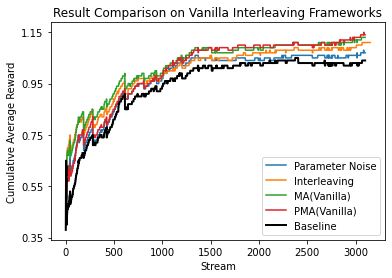

In [20]:
# plt.figure(figsize=(10, 8))

# Param baseline
plt.plot(param2['avg_rewards'][:3100], label='Parameter Noise')

# Only diff
# plt.plot(svd['avg_rewards'], label='SVD')
# plt.plot(pca['avg_rewards'], label='PCA(Action Noise)')
# plt.plot(vae['avg_rewards'], label='VAE')
# plt.plot(item_diff['avg_rewards'], label='Item-based')

# Hybrid diff - constant
# plt.plot(hybrid_2x_pca['avg_rewards'], label='2X') # hybrid_2x_pca
# plt.plot(hybrid_ax_decay_pca['avg_rewards'], label='D2X') # hybrid_2x_decay_pca
# plt.plot(hybrid_2x_decay_pca['avg_rewards'], label='DAX(Constant Multiplier)') # hybrid_ax_decay_pca

# Hybrid diff - vdbe
# plt.plot(hybrid_vdbe_pca['avg_rewards'], label='VDBE Multiplier')

# Hybrid diff - param_multiplier
# plt.plot(hybrid_param_pca['avg_rewards'], label='Parameter Noise Scaling Multiplier')

# Hybrid Interleaving
# plt.plot(interleaving_ax_pca['avg_rewards'], label='AX(interleaving)') # interleaving_ax_pca
# plt.plot(interleaving_decay_ax_pca['avg_rewards'], label='DAX') # interleaving_decay_ax_pca
# plt.plot(interleaving_major_pca['avg_rewards'], label='MA(PCA)') # interleaving_major_pca
# plt.plot(interleaving_param_major_pca['avg_rewards'], label='PMA(PCA)') # interleaving_param_major_pca

# Pure Interleaving
plt.plot(ntlv['avg_rewards'], label='Interleaving') # interleaving_ax_pca
plt.plot(ntlv_ma['avg_rewards'][:3100], label='MA(Vanilla)') # interleaving_ax_pca
plt.plot(ntlv_param_ma['avg_rewards'][:3100], label='PMA(Vanilla)') # interleaving_ax_pca

# Hybrid Interleaving SVD
# plt.plot(interleaving['avg_rewards'][:3100], label='I') # interleaving
# plt.plot(interleaving_decay['avg_rewards'][:3100], label='AX') # interleaving_decay
# plt.plot(interleaving_decay_2x['avg_rewards'][:3100], label='DAX') # interleaving_decay_2x
# plt.plot(interleaving_major['avg_rewards'][:3100], label='MA(SVD-based)') # interleaving_major
# plt.plot(interleaving_major_param['avg_rewards'][:3100], label='PMA(SVD-based)') # interleaving_major_param
# plt.plot(interleaving_param['avg_rewards'][:3100], label='PI') # interleaving_param

# Baseline
plt.plot(baseline622['avg_rewards'][:3100], label='Baseline', color='black', linewidth=2)

plt.yticks(np.arange(0.35, 1.2, 0.2))
# plt.xticks(np.arange(0, 3500, 100), rotation=70)
plt.title('Result Comparison on Vanilla Interleaving Frameworks')
plt.xlabel('Stream')
plt.ylabel('Cumulative Average Reward')
# plt.grid()
plt.legend()

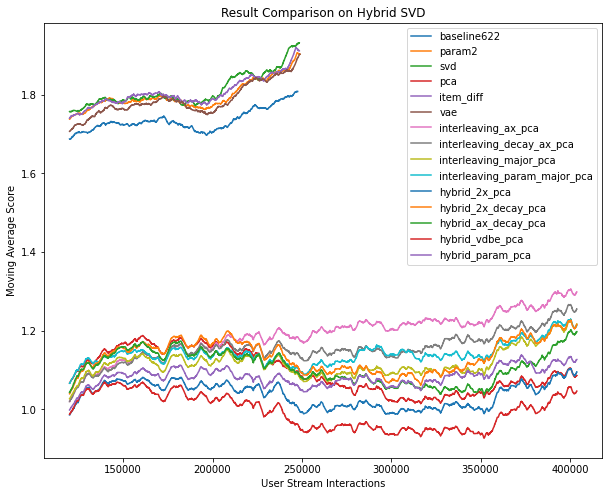

In [22]:
plt.figure(figsize=(10, 8))
plt.plot(pd.Series(baseline622['reward_records']).rolling(120000).mean(), label='baseline622')
plt.plot(pd.Series(param2['reward_records']).rolling(120000).mean(), label='param2')
plt.plot(pd.Series(svd['reward_records']).rolling(120000).mean(), label='svd')
plt.plot(pd.Series(pca['reward_records']).rolling(120000).mean(), label='pca')
plt.plot(pd.Series(item_diff['reward_records']).rolling(120000).mean(), label='item_diff')
plt.plot(pd.Series(vae['reward_records']).rolling(120000).mean(), label='vae')
plt.plot(pd.Series(interleaving_ax_pca['reward_records']).rolling(120000).mean(), label='interleaving_ax_pca')
plt.plot(pd.Series(interleaving_decay_ax_pca['reward_records']).rolling(120000).mean(), label='interleaving_decay_ax_pca')
plt.plot(pd.Series(interleaving_major_pca['reward_records']).rolling(120000).mean(), label='interleaving_major_pca')
plt.plot(pd.Series(interleaving_param_major_pca['reward_records']).rolling(120000).mean(), label='interleaving_param_major_pca')
plt.plot(pd.Series(hybrid_2x_pca['reward_records']).rolling(120000).mean(), label='hybrid_2x_pca')
plt.plot(pd.Series(hybrid_2x_decay_pca['reward_records']).rolling(120000).mean(), label='hybrid_2x_decay_pca')
plt.plot(pd.Series(hybrid_ax_decay_pca['reward_records']).rolling(120000).mean(), label='hybrid_ax_decay_pca')
plt.plot(pd.Series(hybrid_vdbe_pca['reward_records']).rolling(120000).mean(), label='hybrid_vdbe_pca')
plt.plot(pd.Series(hybrid_param_pca['reward_records']).rolling(120000).mean(), label='hybrid_param_pca')

plt.title('Result Comparison on Hybrid SVD')
plt.xlabel('User Stream Interactions')
plt.ylabel('Moving Average Score')
plt.legend()

In [4]:
interleaving_major_pca['mode']

'interleaving_decay_2xdeacy_major_pca'

In [10]:
interleaving_param_major_pca.keys()

dict_keys(['mode', 'reward_records', 'avg_rewards', 'hit_ratios', 'regret_list', 'coverage_list', 'diversity_list'])